In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from helpers.constants import TARGET_PATTERNS, DISTORTED_PATTERNS, VALIDATION_PATTERNS
from helpers.Model import Model
import matplotlib.pyplot as plt

In [2]:
save_dir = os.path.abspath('Saves/')

# Each Character is mapped to a numeric value between 0 and 30
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'i', 'j', 'n', 'y', 'u']
y_true = np.array(list(range(31)))

# Flatten Each of the datasets
target_patterns_flattened_x = np.array(TARGET_PATTERNS['x']).reshape(-1, 7 * 5)         # Target Patterns
val_patterns_flattend_x = np.array(VALIDATION_PATTERNS['x']).reshape(-1, 7 * 5)         # Validation Patterns

# Shuffle the Images 
target_patterns_flattened_x, target_patterns_y = shuffle(target_patterns_flattened_x, y_true)
val_patterns_flattend_x, val_patterns_y = shuffle(val_patterns_flattend_x, y_true)


In [3]:
# Create the Model
model = Model(num_hidden_nodes=15)()
# Display the Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                540       
                                                                 
 dense_1 (Dense)             (None, 31)                496       
                                                                 
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(target_patterns_flattened_x, target_patterns_y, epochs=300, validation_data=(val_patterns_flattend_x, val_patterns_y), batch_size=1)

Epoch 1/300
31/31 [==============================] - 1s 7ms/step - loss: 4.0120 - accuracy: 0.0000e+00 - val_loss: 3.5096 - val_accuracy: 0.0645
Epoch 2/300
31/31 [==============================] - 0s 4ms/step - loss: 3.4739 - accuracy: 0.0000e+00 - val_loss: 3.3690 - val_accuracy: 0.0645
Epoch 3/300
31/31 [==============================] - 0s 4ms/step - loss: 3.3809 - accuracy: 0.0968 - val_loss: 3.2999 - val_accuracy: 0.1613
Epoch 4/300
31/31 [==============================] - 0s 4ms/step - loss: 3.3096 - accuracy: 0.1290 - val_loss: 3.2106 - val_accuracy: 0.2903
Epoch 5/300
31/31 [==============================] - 0s 4ms/step - loss: 3.2245 - accuracy: 0.1613 - val_loss: 3.0887 - val_accuracy: 0.2581
Epoch 6/300
31/31 [==============================] - 0s 4ms/step - loss: 3.0889 - accuracy: 0.1613 - val_loss: 2.9379 - val_accuracy: 0.2903
Epoch 7/300
31/31 [==============================] - 0s 4ms/step - loss: 2.9389 - accuracy: 0.2581 - val_loss: 2.7851 - val_accuracy: 0.3226
Epoch

In [5]:
file = 'optimal_noise_free'

pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{file}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{file}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{file}/final_weights.hdf5'), overwrite=True)

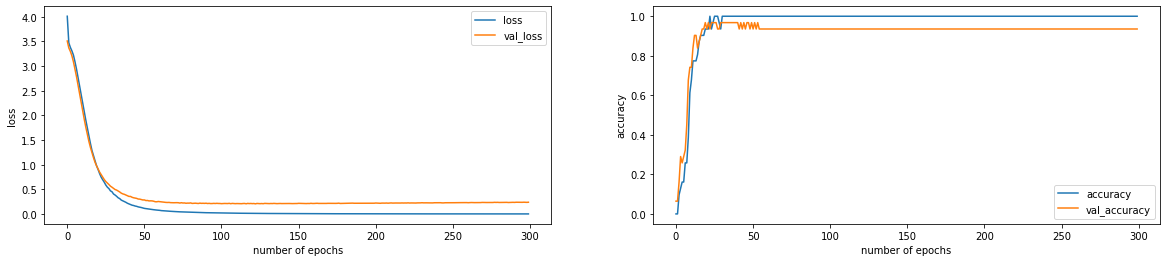

In [6]:
# history = pd.read_hdf(os.path.join(save_dir, f'{file}/history.h5'), 'history')
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(os.path.join(save_dir, f'{file}'), f"training_history.png"))
plt.show()